In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from scipy.misc import imread

In [2]:
import keras


Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
root_dir=os.path.abspath('D:\Analytics vidhya\datasets\age-detect')
data_dir=r'D:\Analytics vidhya\datasets\age-detect'
train=pd.read_csv(os.path.join(data_dir,'train.csv'))
test=pd.read_csv(os.path.join(data_dir,'test.csv'))


In [4]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [6]:
import random
i=random.choice(train.index)
i

7545

In [7]:
import random
i=random.choice(train.index)
img_name=train.ID[i]
img=imread(os.path.join(data_dir,'Train',img_name))
print('Age: ', train.Class[i])


Age:  YOUNG


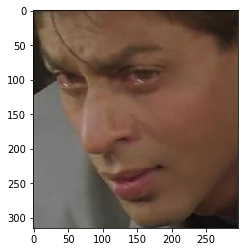

In [8]:
plt.imshow(img)

In [9]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

In [10]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [11]:
train_x = train_x / 255.
test_x = test_x / 255.

In [12]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [13]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [14]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [16]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
19906/19906 [==============================] - 613s 31ms/step - loss: 0.8927 - acc: 0.5778
Epoch 2/5
19906/19906 [==============================] - 605s 30ms/step - loss: 0.8450 - acc: 0.6035
Epoch 3/5
19906/19906 [==============================] - 563s 28ms/step - loss: 0.8294 - acc: 0.6137
Epoch 4/5
19906/19906 [==============================] - 1063s 53ms/step - loss: 0.8155 - acc: 0.62247s - loss: 0.815
Epoch 5/5
19906/19906 [==============================] - 746s 37ms/step - loss: 0.8095 - acc: 0.6295


In [21]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('submission.csv', index=False)